# Logistic Regression

In [ ]:
# we have to maximize the log liklihood
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
n_samples=20
np.random.seed(0)
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)

In [ ]:
df=pd.DataFrame()
df['x1']=X1
df['X2']=X2
df['y']=[0]*10+[1]*10
df=df.sample(frac=1)

In [ ]:
df.head()

,x1,X2,y
17,-0.205158,1.202380,1
5,-0.977278,-1.454366,0
1,0.400157,0.653619,0
2,0.978738,0.864436,0
9,0.410599,1.469359,0


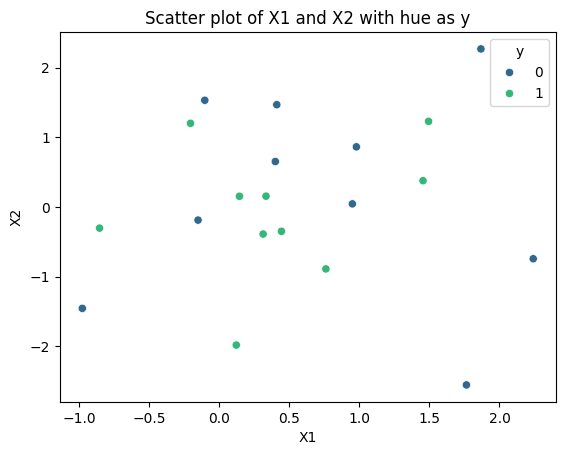

In [ ]:
sns.scatterplot(x='x1', y='X2', hue='y', data=df, palette='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of X1 and X2 with hue as y')
plt.show()

In [ ]:
def gradient_log_likelihood(betas,df):
  X = np.column_stack((np.ones(df.shape[0]), df.x1, df.X2))
  a=np.exp((np.dot(X,betas)))
  p=a/(1+a)
  gradient=np.dot(X.T,(df.y-p))
  return gradient

In [ ]:
betas=np.array([0.0,0.0,0.0])
diff=np.inf
lr=0.1
while diff>0.001:
  grad=gradient_log_likelihood(betas,df)
  diff=abs(grad).sum()
  print(diff)
  betas+=lr*grad
print(betas)

3.0283838019474096
1.5562297117843717
1.0392494556120317
0.7665572013459601
0.5885362060720467
0.46561042499622973
0.3672321488478935
0.2895817593963357
0.2285232706633846
0.18051850782943996
0.14273555897656637
0.11295624937034746
0.08945335974692442
0.07088197226923543
0.05619265751489683
0.04456438083238323
0.035353132643195506
0.02805259956436232
0.022263947968910347
0.017672501443093375
0.014029655867842827
0.011138796844740145
0.008844293769211892
0.007022872024920052
0.0055768322924938385
0.00442871047022228
0.0035170650520574553
0.0027931493995280166
0.0022182801508931482
0.001761754312827185
0.0013991994761779203
0.0011112663570146675
0.0008825921669435299
[ 0.2757773  -0.46803962 -0.17241756]


In [ ]:
def predict_probabilities(X_new, betas):
    X_new = np.column_stack((np.ones(X_new.shape[0]), X_new))
    linear_combination = np.dot(X_new, betas)
    probabilities = 1 / (1 + np.exp(-linear_combination))
    return probabilities

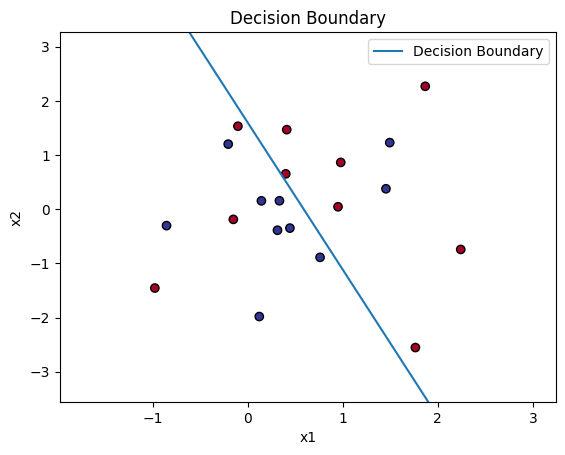

In [ ]:
def plot_decision_boundary(df, betas):
    x_min, x_max = df.x1.min() - 1, df.x1.max() + 1
    y_min, y_max = df.X2.min() - 1, df.X2.max() + 1

    # Calculate decision boundary line
    x_values = np.linspace(x_min, x_max, 100)# news values are generated
    y_values = - (betas[0] + betas[1] * x_values) / betas[2]

    # Plot data points
    plt.scatter(df.x1, df.X2, c=df.y, edgecolors='k', cmap=plt.cm.RdYlBu, marker='o')

    # Plot decision boundary
    plt.plot(x_values, y_values, label='Decision Boundary')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(df, betas)

# Gaussian Mixture Model

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal

In [ ]:
class GMM:
    def __init__(self, n_components, max_iter, comp_names=None):# k,n,labels
        self.n_components = n_components
        self.max_iter = max_iter
        if comp_names is None:
            self.comp_names = []
            for i in range(self.n_components):
                self.comp_names.append(f'comp{i}') #if labels are not provided then gives labels like comp0,comp1.....
        else:
            self.comp_names = comp_names
        self.pi = []
        for i in range(self.n_components):
            self.pi.append(1 / self.n_components) # pik(initially equal gievn to each cluster)

    def fit(self, X):
        new_X = np.array_split(X, self.n_components) # split the dataset along row (k components)
        self.mean_vector = []
        for x_subset in new_X:
            self.mean_vector.append(np.mean(x_subset, axis=0)) # (for each component column wise mean)
        self.covariance_matrices = []
        for x_subset in new_X:
            self.covariance_matrices.append(np.cov(x_subset.T)) # (for each component column wise covariance)
        del new_X # not need
## E part
        for iteration in range(self.max_iter):
            self.r = np.zeros((len(X), self.n_components)) #responsibility or gamma(we have to minimize it)
            for n in range(len(X)):
                for k in range(self.n_components):
                    self.r[n][k] = self.pi[k] * multivariate_normal.pdf(X[n], mean=self.mean_vector[k], cov=self.covariance_matrices[k], allow_singular=True)
                    self.r[n][k] /= sum(self.pi[j] * multivariate_normal.pdf(X[n], mean=self.mean_vector[j], cov=self.covariance_matrices[j], allow_singular=True) for j in range(self.n_components))
#for r matrix ,N is the column wise mean of the r
            N = np.sum(self.r, axis=0)
            ## M part
            self.mean_vector = np.zeros((self.n_components, len(X[0])))
            for k in range(self.n_components):
                for n in range(len(X)):
                    self.mean_vector[k] += self.r[n][k] * X[n]
                self.mean_vector[k] /= N[k] # estimation of the mean of each component using r

            self.covariance_matrices = []
            for k in range(self.n_components):
                self.covariance_matrices.append(np.cov(X.T, aweights=self.r[:, k], ddof=0))  #estimation of the covariance of each component using r

            self.covariance_matrices = [1 / N[k] * self.covariance_matrices[k] for k in range(self.n_components)]

            self.pi = [N[k] / len(X) for k in range(self.n_components)] # estimation of pi also
            # again this will repeated using new mean, pi, cov to calculate the r again in the next iteration

    def predict(self, X):
        probas = []
        for n in range(len(X)):
            probas_per_point = []
            for k in range(self.n_components):
                probas_per_point.append(multivariate_normal.pdf(X[n], mean=self.mean_vector[k], cov=self.covariance_matrices[k]))
            probas.append(probas_per_point)
# for each observation point we get k probablities but the cluster with the highest probablity will be assigned to that point
        cluster = []
        for proba in probas:
            cluster.append(self.comp_names[proba.index(max(proba))])
        return cluster


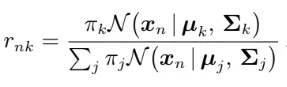
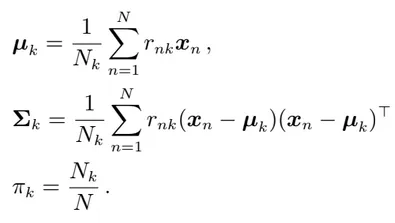

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y=iris.target
n_components=3

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
gmm=GMM(3,5,[0,1,2])

In [ ]:
gmm.fit(x_train)

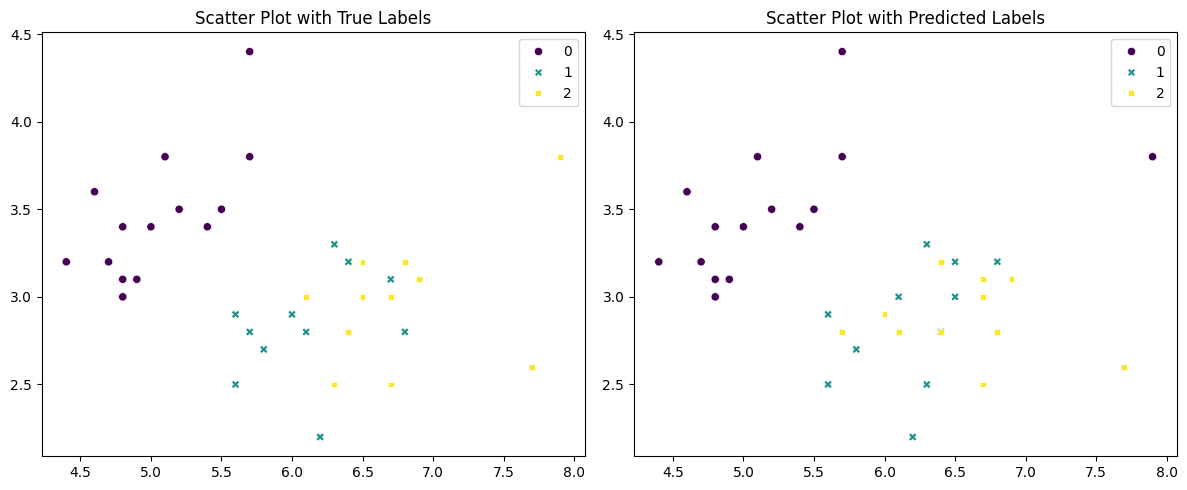

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Predict on the test data
predicted_clusters = gmm.predict(x_test)

# Convert predicted clusters to numeric labels for consistency
unique_clusters = list(set(predicted_clusters))
predicted_labels = [unique_clusters.index(cluster) for cluster in predicted_clusters]

# Plot the scatter plot with true labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_test, palette='viridis', style=y_test, legend='full')
plt.title("Scatter Plot with True Labels")

plt.subplot(1, 2, 2)
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=predicted_labels, palette='viridis', style=predicted_labels, legend='full')
plt.title("Scatter Plot with Predicted Labels")

plt.tight_layout()
plt.show()

0.6578947368421053

# Linear Regression
**Gradient Decent**

In [2]:
class linear_regression:
  def __init__(self,lr=0.01,epochs=10):
    self.lr=lr
    self.epochs=epochs
  def fit(self,x,y):
    self.n_obs,self.n_features=x.shape
    self.w=np.zeros(x.shape[1])
    self.b=0
    self.x=x
    self.y=y
    for i in range(self.epochs):
      self.update_weights()
    return self
  def update_weights(self):
    self.y_predict=self.predict(x)
    self.grad_w=-2*np.sum(np.dot(self.x.T,self.y-self.y_predict))/self.n_obs
    self.grad_b=-2*np.sum(self.y-self.y_predict)/self.n_obs
    self.w=self.w-self.lr*self.grad_w
    self.b=self.b-self.lr*self.grad_b
    return self
  def predict(self,x_test):
    self.y_predict=x_test.dot(self.w)+self.b
    return self.y_predict


In [7]:
x = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 6, 7])
y.T.shape

(5,)

In [4]:
lrg=linear_regression(epochs=50)

In [8]:
lrg.fit(x,y)

In [9]:
lrg.w

array([1.38842366])

**OLS Method**

*β=(X
T
 X)
−1
 X
T
 y*

In [10]:
import copy
import numpy as np

class LinearRegression:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.X = X
        self.y = y
        X = copy.deepcopy(X)
        dummy = np.ones((X.shape[0], 1))
        X = np.concatenate((dummy, X), axis=1)
        betas = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.b = betas[0]
        self.w = betas[1:]
        return self

    def predict(self, X):
        return X.dot(self.w) + self.b

# KNN

In [19]:
import numpy as np
from scipy.stats import mode

class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.n_train = x.shape[0]
        return self

    def predict(self, x_test):
        y_pred = np.zeros(x_test.shape[0])
        for i in range(x_test.shape[0]):
            p = x_test[i]
            neighbors = self.find_neighbors(p)
            y_pred[i] = mode(neighbors)[0]
            #y_pred[i] = np.mean(neighbors) for regression
        return y_pred

    def find_neighbors(self, point):
        distances = np.linalg.norm(self.x - point, axis=1)
        sorted_indices = np.argsort(distances)
        y_sorted = self.y[sorted_indices[:self.n_neighbors]]
        return y_sorted



In [20]:
# Example usage:
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([0, 1, 1, 0])
X_test = np.array([[2, 2], [3, 3]])

knn = KNN(n_neighbors=2)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("Predictions:", predictions)

Predictions: [0. 1.]
